In [9]:
#Check Version
import statsmodels._version
if statsmodels._version.get_versions()['version'] != '0.11.1':
  !pip install --upgrade statsmodels

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from statsmodels.tsa.ar_model import AR, ARResults

In [7]:
cd "/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data"

/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data


In [13]:
df = pd.read_csv('uspopulation.csv',index_col='DATE',parse_dates=True)

In [14]:
df.index.freq = 'MS' # Month Start

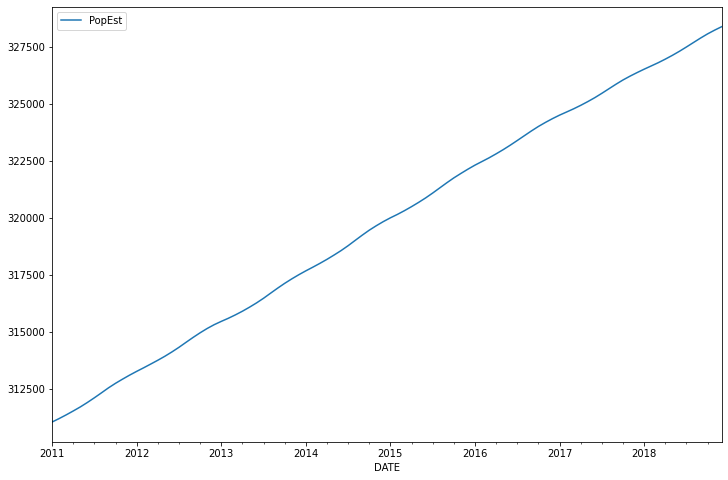

In [15]:
df.plot(figsize=(12,8))

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Figure(432x288)
Figure(432x288)


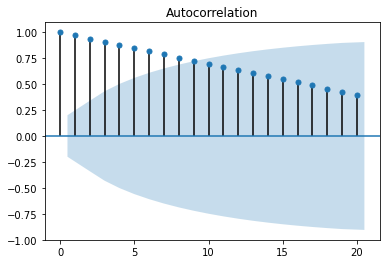

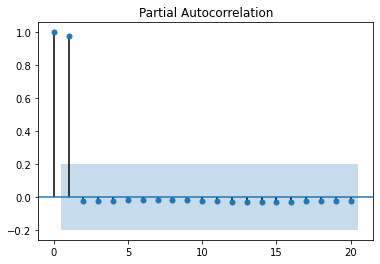

In [71]:
print(plot_acf(df['PopEst']));
print(plot_pacf(df['PopEst']));

Split train test

In [119]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [120]:
import warnings 
warnings.filterwarnings('ignore')

In [121]:
model = AR(train['PopEst'])

In [122]:
AR1fit = model.fit(maxlag=1)

In [123]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [124]:
start = len(train)
end = len(train)+len(test)-1

In [125]:
predictions1 = AR1fit.predict(start=start,end = end)

In [126]:
predictions1 = predictions1.rename("AR(1) Predictions")

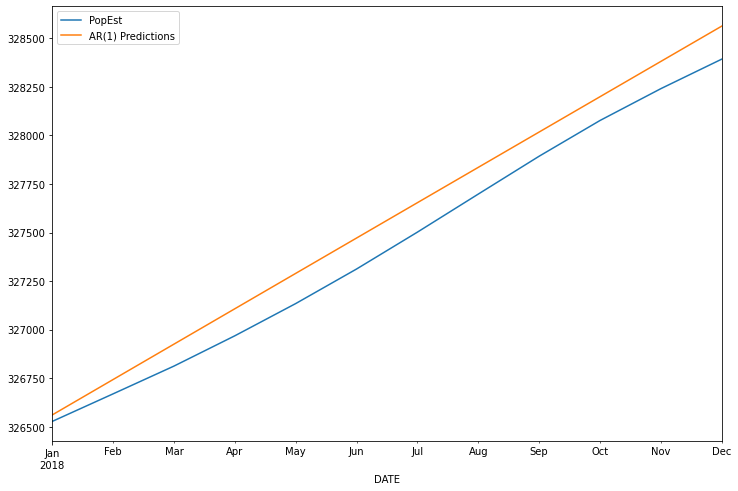

In [127]:
test.plot(figsize=(12,8),legend = True)
predictions1.plot(legend = True)

In [128]:
AR2fit = AR(train['PopEst']).fit(maxlag = 2)

In [129]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [130]:
predictions2 = AR2fit.predict(start,end)

In [131]:
predictions2.rename('AR(2) Predictions',inplace=True);

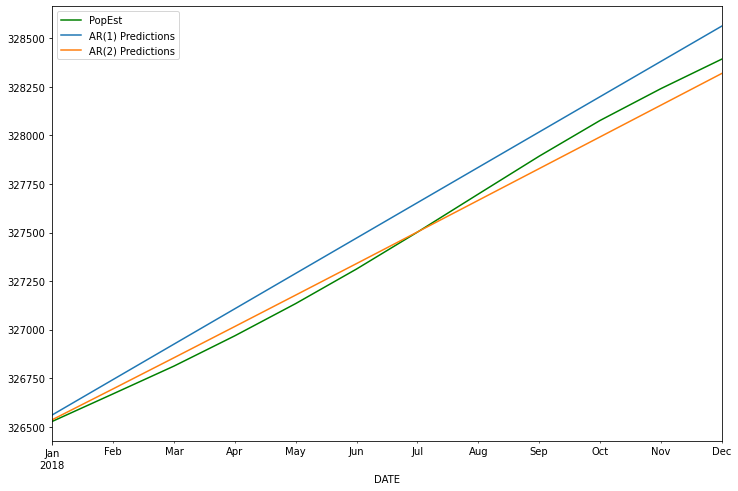

In [132]:
test.plot(figsize=(12,8),legend = True,color = 'g')
predictions1.plot(legend = True)
predictions2.plot(legend = True)

In [133]:
ARfit = AR(train['PopEst']).fit(ic='t-stat')

In [134]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [150]:
predictions8 = ARfit.predict(start=start,end=end)
predictions8.rename('AR(8) Predictions',inplace=True);

In [151]:
from sklearn.metrics import mean_squared_error

In [152]:
labels = ['AR(1)','AR(2)','AR(8)']

In [153]:
preds = [predictions1,predictions2,predictions8]

In [154]:
mean_squared_error(predictions1,test)

17449.71423587912

In [155]:
print('Predictions Squared Root Mean Squared Error')
for i,p in enumerate(preds):
  print(f'{labels[i]}: {np.sqrt(mean_squared_error(test,p)):.0f}')

Predictions Squared Root Mean Squared Error
AR(1): 132
AR(2): 52
AR(8): 14


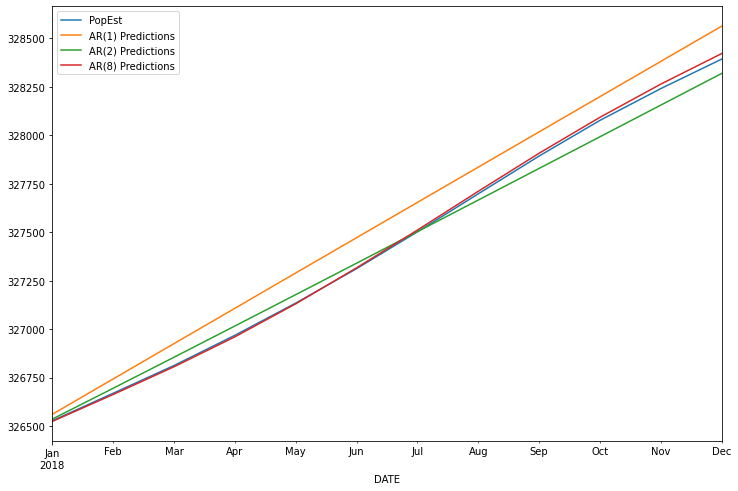

In [177]:
test.plot(figsize=(12,8))

for p in preds:
  p.plot(legend=True)

Forecasting the Future

In [159]:
ARfit_future = AR(df['PopEst']).fit()

In [163]:
ARfit_future.params

const         84.885175
L1.PopEst      2.296674
L2.PopEst     -2.109518
L3.PopEst      1.429221
L4.PopEst     -1.259837
L5.PopEst      1.093852
L6.PopEst     -0.985774
L7.PopEst      1.066295
L8.PopEst     -0.858709
L9.PopEst      0.826672
L10.PopEst    -1.074975
L11.PopEst     1.034535
L12.PopEst    -0.458679
dtype: float64

In [183]:
future_Prediction = ARfit_future.predict(start=len(df),end=len(df)+12)

In [184]:
future_Prediction.rename('AR(12) Prediction',inplace=True);

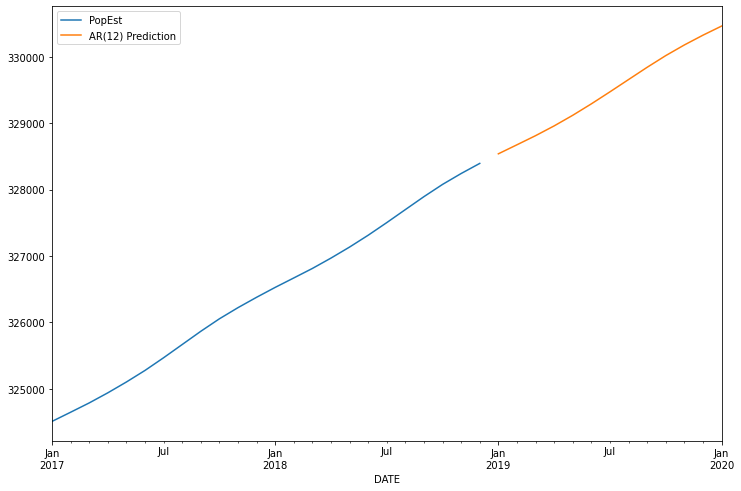

In [185]:
df['PopEst'].iloc[-24:].plot(figsize=(12,8),legend = True)
future_Prediction.plot(legend = True)